# FSL Randomise

**Author:** Monika Doerig, 8 Oct 2025  

[<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> MoniDoerig](https://github.com/MoniDoerig)

[<img src="https://info.orcid.org/wp-content/uploads/2019/11/orcid_16x16.png" width="20"> 0009-0008-3617-2185](https://orcid.org/0009-0008-3617-2185)


In [1]:
import module
await module.load('fsl/6.0.7.4')
await module.list()

['fsl/6.0.7.4']

In [2]:
import os
os.environ["FSLOUTPUTTYPE"]="NIFTI_GZ"

In [3]:
import matplotlib.pyplot as plt
import json
from os.path import join as opj
import nibabel as nib
import pandas as pd
import numpy as np
from nilearn import plotting

In [4]:
import nipype.interfaces.fsl as fsl

251008-06:47:25,366 nipype.utils WARNING:
	 A newer version (1.10.0) of nipy/nipype is available. You are using 1.8.6


In [5]:
# create intersect mask for fsl randomise
!fslmaths /mnt/neurodesktop-storage/Analysis/RSA_siibra_brain_atlas/Merged_files_group_comparison/all_files_seg80.nii.gz -Tstd -bin /mnt/neurodesktop-storage/Data/tempRSA/intersect_mask_41HC_45PAT.nii.gz

## 1. Randomise One-sample_TTest

In [7]:
# Patient Data: files are already merged
base_path = '/mnt/neurodesktop-storage/Data/tempRSA/RSA'

# Single model
PAT_45_seg_80 = opj(base_path, 'PAT_Segmental_Model_80Hz_nosmooth_r2/PAT_Segmental_Model_80Hz_nosmooth_r2/all_files_N45.nii.gz')
PAT_45_seg_20 = opj(base_path, 'PAT_Segmental_Model_20Hz_nosmooth_r2/PAT_Segmental_Model_20Hz_nosmooth_r2/all_files_N45.nii.gz')
PAT_45_simple_80 = opj(base_path, 'PAT_Simple_Model_80Hz_nosmooth_r2/PAT_Simple_Model_80Hz_nosmooth_r2/all_files_N45.nii.gz')
PAT_45_simple_20 = opj(base_path, 'PAT_Simple_Model_20Hz_nosmooth_r2/PAT_Simple_Model_20Hz_nosmooth_r2/all_files_N45.nii.gz')
PAT_45_random_80 = opj(base_path, 'PAT_Random_Model_80Hz_nosmooth_r2/PAT_Random_Model_80Hz_nosmooth_r2/all_files_N45.nii.gz')
PAT_45_random_20 = opj(base_path, 'PAT_Random_Model_20Hz_nosmooth_r2/PAT_Random_Model_20Hz_nosmooth_r2/all_files_N45.nii.gz')

# Model comparison
PAT_45_Seg80minusRan80 = opj(base_path, 'Model_Comparison_PAT/input/N45_Seg80minusRan80.nii.gz')
PAT_45_Seg80minusSim80 = opj(base_path, 'Model_Comparison_PAT/input/N45_Seg80minusSim80.nii.gz')
PAT_45_Seg20minusRan20 = opj(base_path, 'Model_Comparison_PAT/input/N45_Seg20minusRan20.nii.gz')
PAT_45_Seg20minusSim20 = opj(base_path, 'Model_Comparison_PAT/input/N45_Seg20minusSim20.nii.gz')
PAT_45_Sim80minusRan80 = opj(base_path, 'Model_Comparison_PAT/input/N45_Sim80minusRan80.nii.gz')
PAT_45_Sim20minusRan20 = opj(base_path, 'Model_Comparison_PAT/input/N45_Sim20minusRan20.nii.gz')


mask = '/mnt/neurodesktop-storage/Data/tempRSA/intersect_mask_41HC_45PAT.nii.gz'

In [8]:
# Healthy controls

# Single model
HC_41_seg_80 = opj(base_path, 'Seg80_DMC/nosmooth/all_files_N41.nii.gz')
HC_41_seg_20 = opj(base_path, 'Seg20_DMC/nosmooth/all_files_N41.nii.gz')
HC_41_simple_80 = opj(base_path, 'Sim80_DMC/nosmooth/all_files_N41.nii.gz')
HC_41_simple_20 = opj(base_path, 'Sim80_DMC/nosmooth/all_files_N41.nii.gz')
HC_41_random_80 = opj(base_path, 'Ran80_DMC/nosmooth/all_files_N41.nii.gz')
HC_41_random_20 = opj(base_path, 'Ran80_DMC/nosmooth/all_files_N41.nii.gz')

# Model comparison
HC_41_Seg80minusRan80 = opj(base_path, 'Model_Comparison_HCs/input/N45_Seg80minusRan80.nii.gz')
HC_41_Seg80minusSim80 = opj(base_path, 'Model_Comparison_HCs/input/N45_Seg80minusSim80.nii.gz')
HC_41_Seg20minusRan20 = opj(base_path, 'Model_Comparison_HCs/input/N45_Seg20minusRan20.nii.gz')
HC_41_Seg20minusSim20 = opj(base_path, 'Model_Comparison_HCs/input/N45_Seg20minusSim20.nii.gz')
HC_41_Sim80minusRan80 = opj(base_path, 'Model_Comparison_HCs/input/N45_Sim80minusRan80.nii.gz')
HC_41_Sim20minusRan20 = opj(base_path, 'Model_Comparison_HCs/input/N45_Sim20minusRan20.nii.gz')

#### Run randomise

In [9]:
rand_one_samp = fsl.Randomise()
rand_one_samp.inputs.in_file = PAT_45_Seg20minusRan20 # change datasets
rand_one_samp.inputs.mask = mask
rand_one_samp.inputs.base_name = '1sampTtest_perm10k_N45_Seg20minusRan20'
rand_one_samp.inputs.tfce = True
rand_one_samp.inputs.num_perm = 10000                    
rand_one_samp.inputs.cm_thresh = 2.3
rand_one_samp.inputs.vox_p_values = True
rand_one_samp.inputs.one_sample_group_mean = True #Perform 1-sample group-mean test instead of generic permutation test. [flag -1]

rand_one_samp.cmdline

'randomise -i /mnt/neurodesktop-storage/Data/tempRSA/RSA/Model_Comparison_PAT/input/N45_Seg20minusRan20.nii.gz -o "1sampTtest_perm10k_N45_Seg20minusRan20" -C 2.3 -m /mnt/neurodesktop-storage/Data/tempRSA/intersect_mask_41HC_45PAT.nii.gz -n 10000 -1 -T -x'

In [ ]:
# Run the command - for documentation purposes not run as the output would overload the notebook
rand_one_samp.run()

### Additional Covariate of Patients for Regression Analysis

In [ ]:
#FreBAQ
fremantle_pat = [18., 6, 5, 5, 3, 7, 4, 27, 11, 1, 1, 8, 7, 10, 3, 6, 3, 3, 6, 0, 10, 10, 
                 4, 6, 2, 3, 3, 3, 3, 13, 5, 8, 8, 3, 6, 8, 3, 5, 15, 7, 22, 8, 15, 7, 14]


#pain duration
pain_duration = [562., 2300, 859, 5615, 2296, 2627 ,2194, 1205, 1527, 228, 4192, 7849, 2653, 1281, 775, 403, 4456, 2593, 1032, 7142, 5518, 
                 4371, 4715, 1435, 1945, 3275, 2599, 1842, 1473, 3275, 1838, 4279, 1493, 150, 2278, 3739, 3359, 2673, 4476, 2292, 2671, 5069, 
                 2337, 2214, 4272]

#during mri (painSensationRsession)
pain_mri =[1., 2, 4, 3, 2, 0, 3, 4, 1, 3, 3, 1, 0, 6, 0, 3, 1, 1, 2, 0, 4, 4, 6, 3, 
           2, 3, 3, 3, 1, 2, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 5, 0, 6, 0, 2]


# avg pain over 4 weeks (#pain_detect_3)
avg_pain_4weeks = [4., 5, 5, 3, 2, 6, 1, 5, 3, 6, 4, 4, 4, 4, 2, 7, 1, 4, 3, 3, 3, 5, 6, 
                   4, 1, 3, 5, 4, 2, 2, 3, 4, 5, 2, 4, 1, 5, 7, 6, 6, 4, 4, 4, 1, 3] 


# max_pain over 4 weeks (pain_detect_2)
max_pain = [4., 8, 8, 6, 5, 7, 4, 10, 5, 10, 5, 6, 5, 7, 4, 8, 3, 6, 7, 7, 5, 7, 9, 7, 1, 5, 8, 
            9, 6, 6, 5, 7, 6, 5, 6, 5, 6, 9, 8, 8, 7, 6, 7, 4, 7]

#tsk
tsk = [35., 47, 39, 27, 30, 31, 36, 35, 34, 43, 33, 28, 28, 35, 30, 39, 38, 30, 29, 27, 33, 34, 
       35, 22, 30, 23, 37, 25, 30, 34, 26, 34, 31, 38, 35, 30, 49, 31, 28, 38, 29, 25, 26, 37, 24]


#pain_detect
pain_detect = [23., 13, 25, 12, 13, 18, 13, 25, 14, 12, 9, 18, 13, 15, 14, 20, 11, 13, 19, 9, 11, 20, 20,
               15, 10, 9, 11, 16, 16, 12, 9, 11, 14, 15, 14, 16, 15, 14, 17, 4, 18, 18, 15, 4, 10]

In [ ]:
from nipype.interfaces.fsl import MultipleRegressDesign

model = MultipleRegressDesign()

model.inputs.contrasts = [['pos eff pain dur', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain', 'max_pain', 'tsk', 'pain_detect'], [1, 0, 0, 0, 0, 0, 0]],
                         ['neg eff pain dur', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain', 'max_pain', 'tsk',  'pain_detect'], [-1, 0, 0, 0, 0, 0, 0]],
                         ['pos eff fremantle', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0, 1, 0, 0, 0, 0, 0]],
                         ['neg eff fremantle', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0,-1, 0, 0, 0, 0, 0]],
                         ['pos eff mom pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain', 'max_pain', 'tsk',  'pain_detect'], [0, 0, 1 ,0, 0, 0, 0]],
                         ['neg eff mom pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0, 0, -1, 0, 0, 0, 0]],
                         ['pos eff avg pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain', 'max_pain', 'tsk',  'pain_detect'], [0, 0, 0, 1, 0, 0, 0]],
                         ['neg eff avg pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0 ,0, 0, -1, 0, 0, 0]],
                         ['pos eff max pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain', 'max_pain', 'tsk',  'pain_detect'], [0, 0, 0, 0, 1, 0, 0]],
                         ['neg eff max pain', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0 ,0, 0, 0, -1, 0, 0]],
                         ['pos eff tsk', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0, 0, 0, 0, 0, 1, 0]],
                         ['neg eff tsk', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0 ,0, 0, 0, 0, -1, 0]],
                         ['pos eff pain_detect', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0, 0, 0, 0, 0, 0, 1]],
                         ['neg eff pain_detect', 'T', ['pain_duration','fremantle', 'pain_mri', 'avg_pain','max_pain', 'tsk',  'pain_detect'], [0 ,0, 0, 0, 0, 0, -1]]
                          
    ]

# regressors
model.inputs.regressors = dict( pain_duration = pain_duration,
                                fremantle = fremantle_pat,
                                pain_mri = pain_mri,
                                avg_pain = avg_pain_4weeks,
                                max_pain = max_pain,
                                tsk = tsk,
                                pain_detect = pain_detect)

model_result = model.run() 

print(model_result.outputs.design_mat)
print(model_result.outputs.design_con)

/mnt/neurodesktop-storage/Clean_notebooks/design.mat
/mnt/neurodesktop-storage/Clean_notebooks/design.con


In [12]:
design_mat_PAT45 = model_result.outputs.design_mat
tcon_file_PAT45 = model_result.outputs.design_con

rand = fsl.Randomise()
rand.inputs.in_file = PAT_45_Seg20minusRan20 # change datasets
rand.inputs.base_name = 'PAT45_Seg20minusRan20_regress_cov_perm10k'
rand.inputs.tfce = True
rand.inputs.num_perm = 10000
rand.inputs.design_mat = design_mat_PAT45               
rand.inputs.tcon = tcon_file_PAT45                         
rand.inputs.demean = True
rand.inputs.cm_thresh = 2.3
rand.inputs.vox_p_values = True

rand.cmdline

'randomise -i /mnt/neurodesktop-storage/Data/tempRSA/RSA/Model_Comparison_PAT/input/N45_Seg20minusRan20.nii.gz -o "PAT45_Seg20minusRan20_regress_cov_perm10k" -d /mnt/neurodesktop-storage/Clean_notebooks/design.mat -t /mnt/neurodesktop-storage/Clean_notebooks/design.con -C 2.3 -D -n 10000 -T -x'

In [ ]:
# run the command
rand.run()

## 2. Randomise Two-sample unpaired TTest for group comparisons (group_diffs)


In [13]:
# Datasets (already merged)
HC41_PAT45_Seg_20 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Seg20only.nii.gz')
HC41_PAT45_Seg_80 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Seg80only.nii.gz')
HC41_PAT45_Sim_20 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Sim20only.nii.gz')
HC41_PAT45_Sim_80 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Sim80only.nii.gz')

HC41_PAT45_Seg80minusRan80 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Seg80minusRan80.nii.gz')
HC41_PAT45_Seg80minusSim80 = opj(base_path, 'group_diffs_HC_PAT/all_files_41HCs_45PAT_Seg80minusSim80.nii.gz')

In [14]:
nib.load(HC41_PAT45_Seg_20).shape

(91, 109, 91, 86)

In [15]:
model_groups = MultipleRegressDesign()

model_groups.inputs.contrasts = [['HC>PAT',   'T', ['HC', 'PAT'], [1, -1]],
                          ['PAT>HC',   'T', ['HC', 'PAT'], [-1, 1]],
                          ['group mean HC',   'T', ['HC', 'PAT'], [1, 0]],
                          ['group mean PAT',   'T', ['HC', 'PAT'], [0, 1]]]

model_groups.inputs.regressors = dict(HC=41*[1]+45*[0],
                              PAT=41*[0]+45*[1])

model_groups = model.run() 

print(model_groups.outputs.design_mat)
print(model_groups.outputs.design_con)

/mnt/neurodesktop-storage/Clean_notebooks/design.mat
/mnt/neurodesktop-storage/Clean_notebooks/design.con


In [16]:
rand_unpaired = fsl.Randomise()
rand_unpaired.inputs.in_file = HC41_PAT45_Seg80minusRan80 #change datasets
rand_unpaired.inputs.mask = mask
rand_unpaired.inputs.base_name = 'Seg80minusRan80_unpairedTTest_perm10k_41HC_45PAT_test'
rand_unpaired.inputs.design_mat = model_groups.outputs.design_mat          
rand_unpaired.inputs.tcon = model_groups.outputs.design_con                      
rand_unpaired.inputs.tfce = True
rand_unpaired.inputs.num_perm = 10000
rand_unpaired.inputs.cm_thresh = 2.3
rand_unpaired.inputs.vox_p_values = True

rand_unpaired.cmdline

'randomise -i /mnt/neurodesktop-storage/Data/tempRSA/RSA/group_diffs_HC_PAT/all_files_41HCs_45PAT_Seg80minusRan80.nii.gz -o "Seg80minusRan80_unpairedTTest_perm10k_41HC_45PAT_test" -d /mnt/neurodesktop-storage/Clean_notebooks/design.mat -t /mnt/neurodesktop-storage/Clean_notebooks/design.con -C 2.3 -m /mnt/neurodesktop-storage/Data/tempRSA/intersect_mask_41HC_45PAT.nii.gz -n 10000 -T -x'

In [ ]:
# run command
rand_unpaired.run()

### Results Regression Analysis Patients

In [17]:
#80Hz
pos_eff_duration_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_eff_duration_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'
pos_eff_fremantle_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat3.nii.gz'
neg_eff_fremantle_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat4.nii.gz'
pos_eff_avg_pain_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat7.nii.gz'
neg_eff_avg_pain_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat8.nii.gz'
pos_eff_pain_mri_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_eff_pain_mri_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'
pos_max_pain_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat3.nii.gz'
neg_max_pain_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat4.nii.gz'
pos_tsk_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_tsk/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_tsk_80 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_tsk/PAT45_Seg80minusRan80_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'

In [18]:
#20Hz
pos_eff_duration_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_eff_duration_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'
pos_eff_fremantle_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat3.nii.gz'
neg_eff_fremantle_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat4.nii.gz'
pos_eff_avg_pain_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat7.nii.gz'
neg_eff_avg_pain_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_Cov_oneSample/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat8.nii.gz'
pos_eff_pain_mri_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_eff_pain_mri_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'
pos_max_pain_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat3.nii.gz'
neg_max_pain_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_painMRI_maxPain/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat4.nii.gz'
pos_tsk_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_tsk/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat1.nii.gz'
neg_tsk_20 = '/mnt/neurodesktop-storage/Clean_notebooks/Results_Pat_tsk/PAT45_Seg20minusRan20_regress_cov_perm10k_tfce_corrp_tstat2.nii.gz'

#### 80 Hz

/tmp/ipykernel_49415/2987617243.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_pain_mri_80, title="pos effect of pain mri_sess", threshold=0.95, colorbar=True)


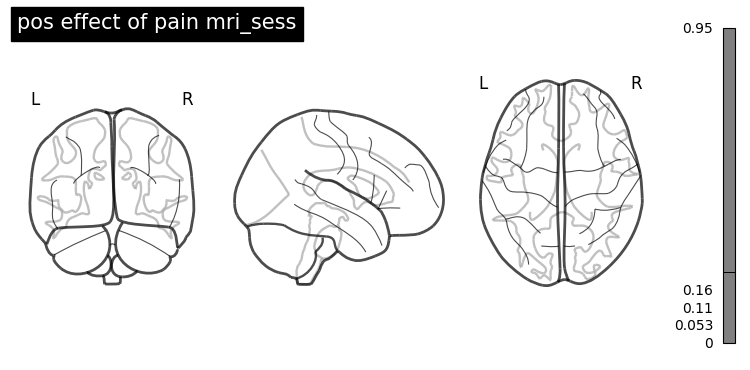

In [19]:
plotting.plot_glass_brain(pos_eff_pain_mri_80, title="pos effect of pain mri_sess", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/1260566691.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_pain_mri_80, title="neg effect of pain mri_sess", threshold=0.95, colorbar=True)


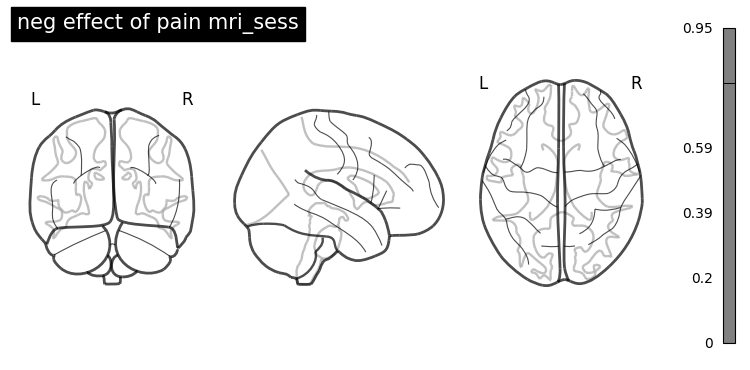

In [20]:
plotting.plot_glass_brain(neg_eff_pain_mri_80, title="neg effect of pain mri_sess", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/693732597.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_max_pain_80, title="pos effect of max pain", threshold=0.95, colorbar=True)


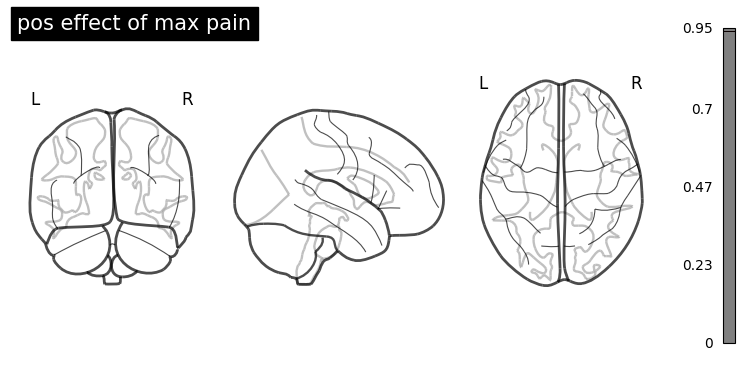

In [21]:
plotting.plot_glass_brain(pos_max_pain_80, title="pos effect of max pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/1633136479.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_max_pain_80, title="neg effect of max pain", threshold=0.95, colorbar=True)


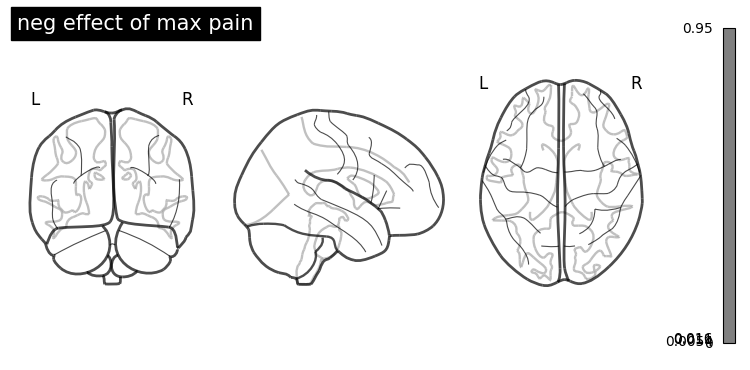

In [22]:
plotting.plot_glass_brain(neg_max_pain_80, title="neg effect of max pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/1103860024.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_duration_80, title="pos effect of pain duration", threshold=0.95, colorbar=True)


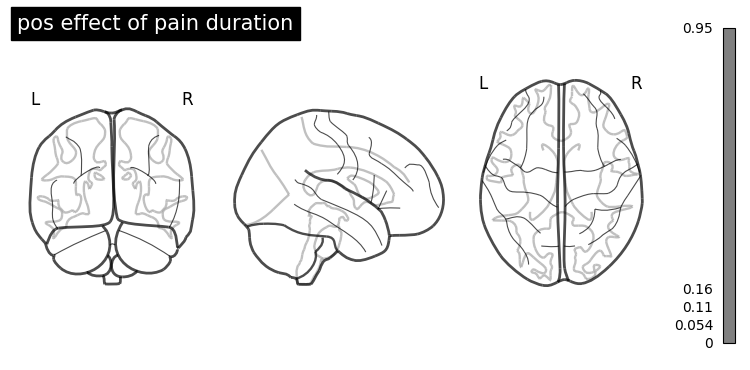

In [23]:
plotting.plot_glass_brain(pos_eff_duration_80, title="pos effect of pain duration", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3277302920.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_duration_80, title="neg effect of pain duration", threshold=0.95, colorbar=True)


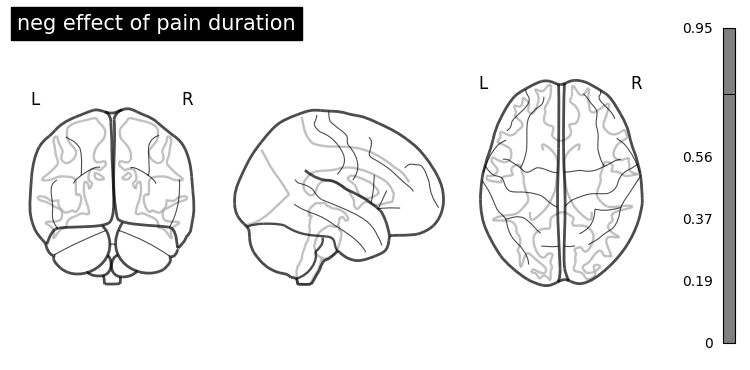

In [24]:
plotting.plot_glass_brain(neg_eff_duration_80, title="neg effect of pain duration", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/2852459294.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_fremantle_80, title="pos effect of fremantle score", threshold=0.95, colorbar=True)


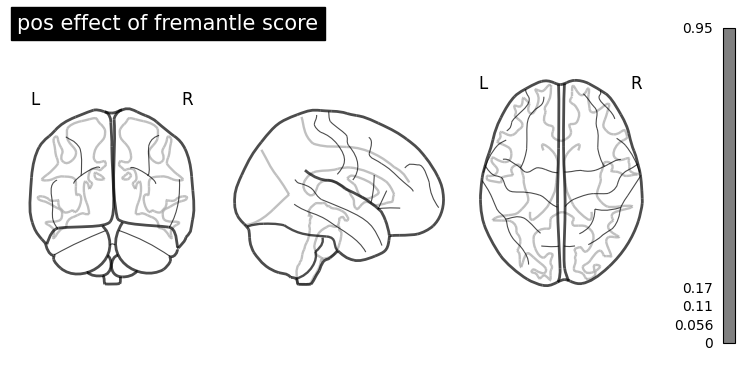

In [25]:
plotting.plot_glass_brain(pos_eff_fremantle_80, title="pos effect of fremantle score", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/686079066.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_fremantle_80, title="neg effect of fremantle score", threshold=0.95, colorbar=True)


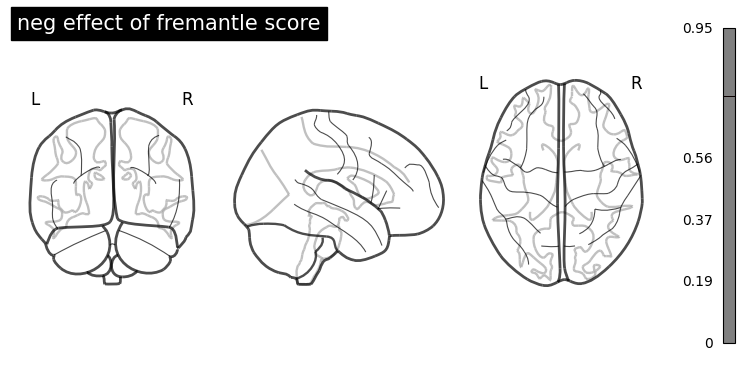

In [26]:
plotting.plot_glass_brain(neg_eff_fremantle_80, title="neg effect of fremantle score", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3819766047.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_avg_pain_80, title="pos effect of average pain", threshold=0.95, colorbar=True)


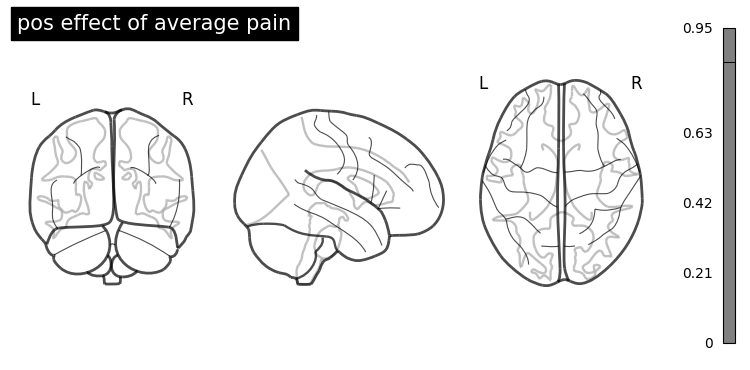

In [27]:
plotting.plot_glass_brain(pos_eff_avg_pain_80, title="pos effect of average pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/1143205220.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_avg_pain_80, title="neg effect of average pain", threshold=0.95, colorbar=True)


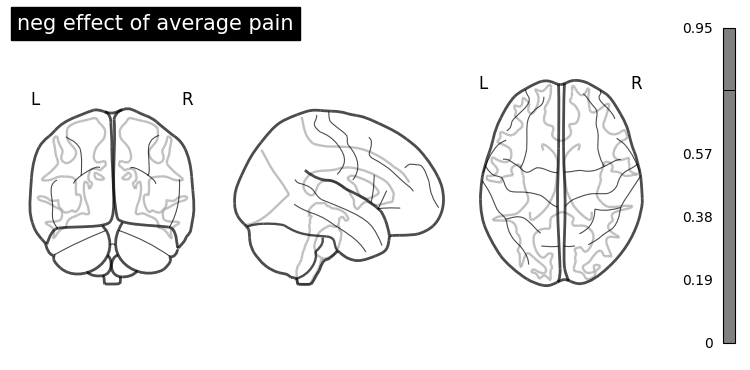

In [28]:
plotting.plot_glass_brain(neg_eff_avg_pain_80, title="neg effect of average pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/1393516168.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_tsk_80, title="pos effect of tsk", threshold=0.95, colorbar=True)


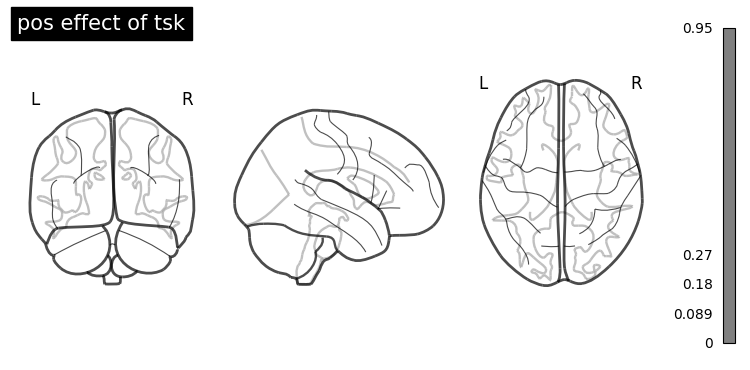

In [29]:
plotting.plot_glass_brain(pos_tsk_80, title="pos effect of tsk", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3936121261.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_tsk_80, title="neg effect of tsk", threshold=0.95, colorbar=True)


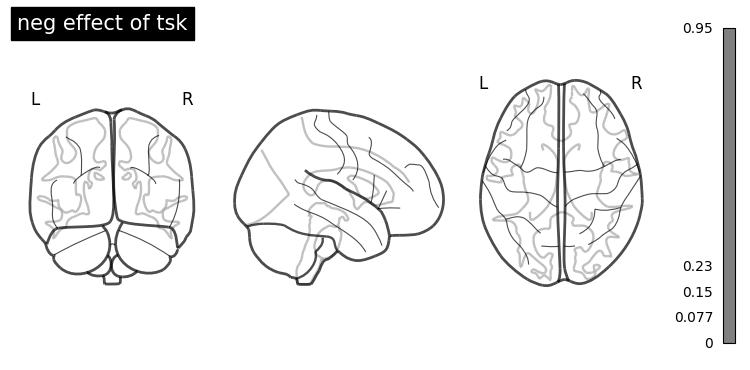

In [30]:
plotting.plot_glass_brain(neg_tsk_80, title="neg effect of tsk", threshold=0.95, colorbar=True)

#### 20 Hz

/tmp/ipykernel_49415/3780946051.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_pain_mri_20, title="pos effect of pain mri_sess", threshold=0.95, colorbar=True)


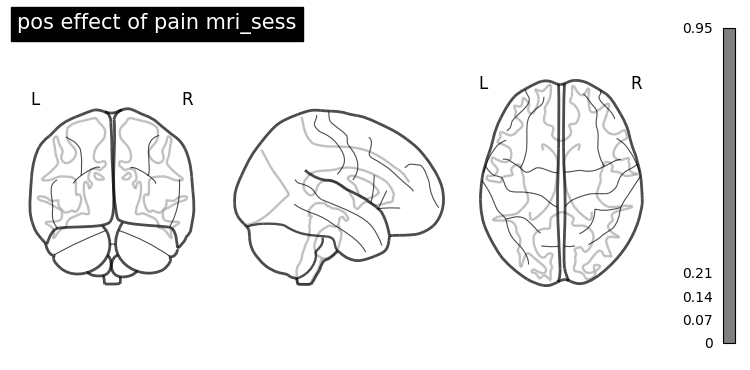

In [31]:
plotting.plot_glass_brain(pos_eff_pain_mri_20, title="pos effect of pain mri_sess", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3707267572.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_pain_mri_20, title="neg effect of pain mri_sess", threshold=0.95, colorbar=True)


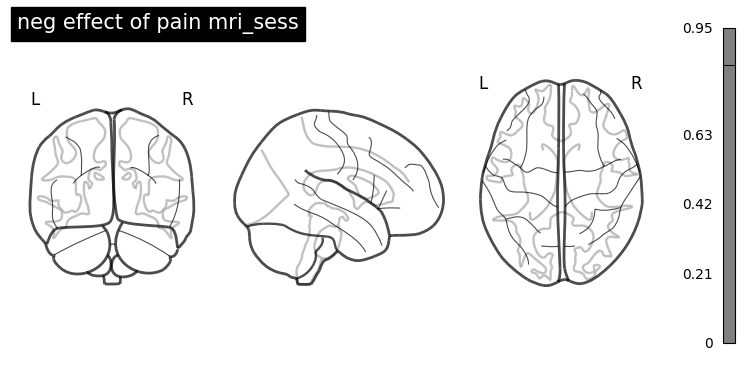

In [32]:
plotting.plot_glass_brain(neg_eff_pain_mri_20, title="neg effect of pain mri_sess", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/927539962.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_max_pain_20, title="pos effect of max pain", threshold=0.95, colorbar=True)


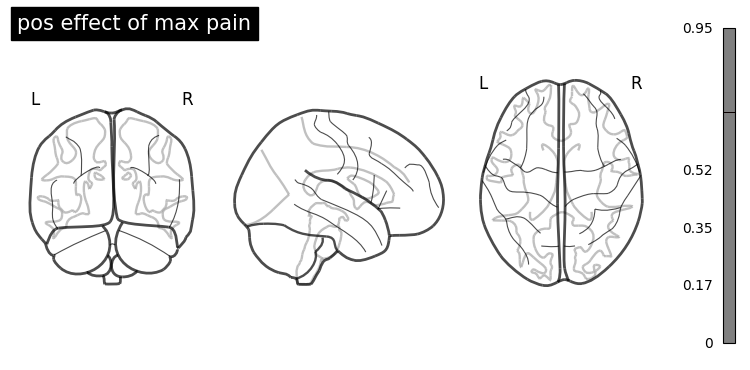

In [33]:
plotting.plot_glass_brain(pos_max_pain_20, title="pos effect of max pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/942802251.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_max_pain_20, title="neg effect of max pain", threshold=0.95, colorbar=True)


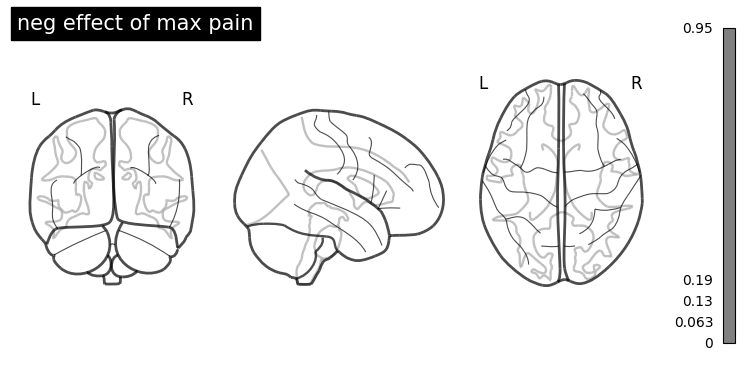

In [34]:
plotting.plot_glass_brain(neg_max_pain_20, title="neg effect of max pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/137693868.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_duration_20, title="pos effect of duration", threshold=0.95, colorbar=True)


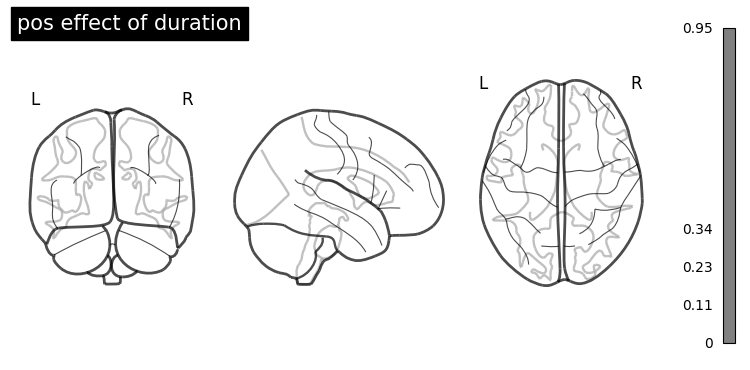

In [35]:
plotting.plot_glass_brain(pos_eff_duration_20, title="pos effect of duration", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/2168824493.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_duration_20, title="neg effect of duration", threshold=0.95, colorbar=True)


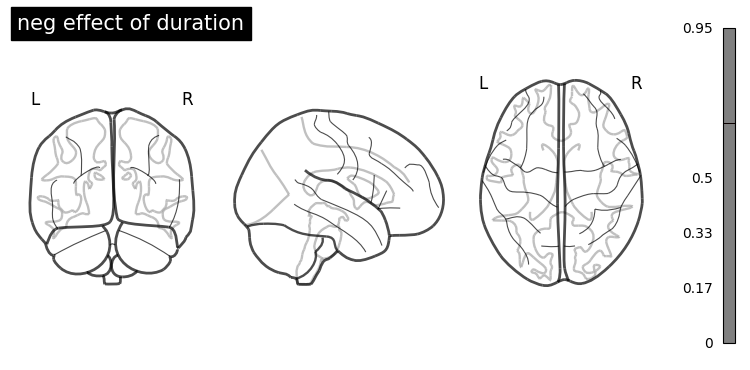

In [36]:
plotting.plot_glass_brain(neg_eff_duration_20, title="neg effect of duration", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3619365463.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_fremantle_20, title="pos effect of fremantle score", threshold=0.95, colorbar=True)


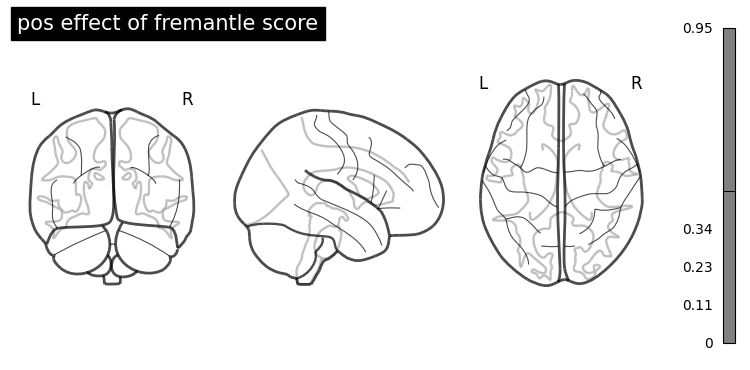

In [37]:
plotting.plot_glass_brain(pos_eff_fremantle_20, title="pos effect of fremantle score", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/2274973478.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_fremantle_20, title="neg effect of fremantle score", threshold=0.95, colorbar=True)


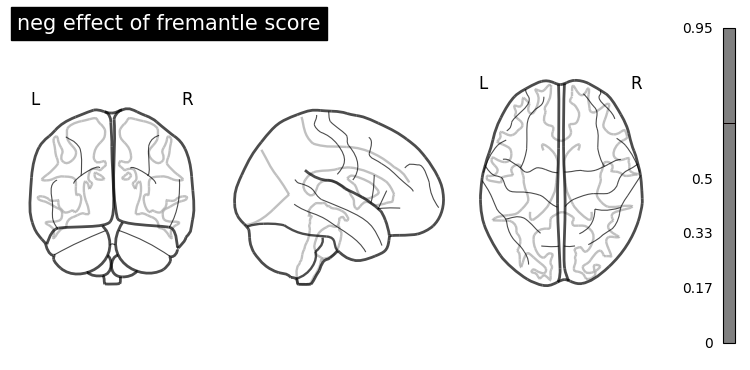

In [38]:
plotting.plot_glass_brain(neg_eff_fremantle_20, title="neg effect of fremantle score", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/2124333301.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_eff_avg_pain_20, title="pos effect of average pain", threshold=0.95, colorbar=True)


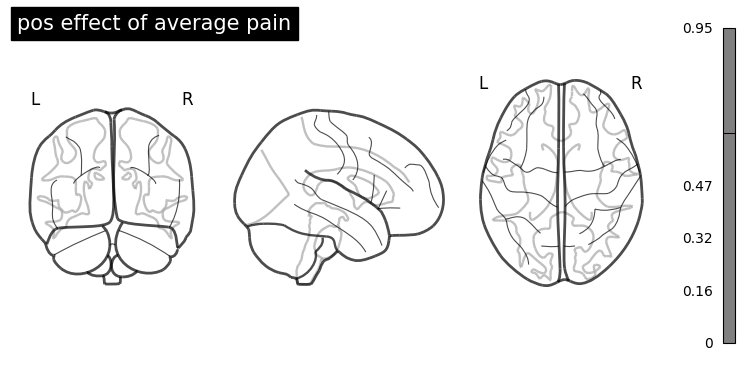

In [39]:
plotting.plot_glass_brain(pos_eff_avg_pain_20, title="pos effect of average pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/3156739864.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_eff_avg_pain_20, title="neg effect of average pain", threshold=0.95, colorbar=True)


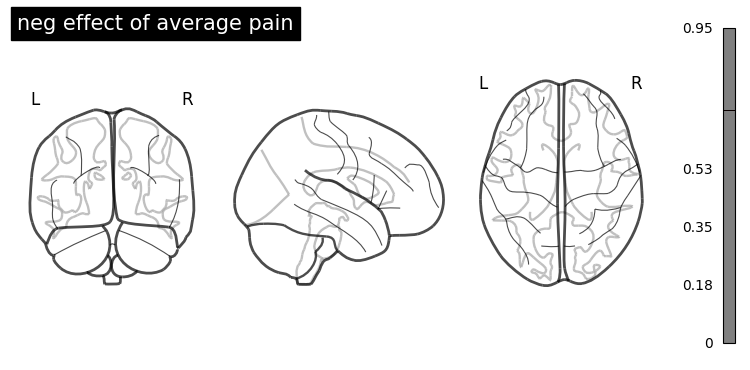

In [40]:
plotting.plot_glass_brain(neg_eff_avg_pain_20, title="neg effect of average pain", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/2578700502.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(pos_tsk_20, title="pos effect of tsk", threshold=0.95, colorbar=True)


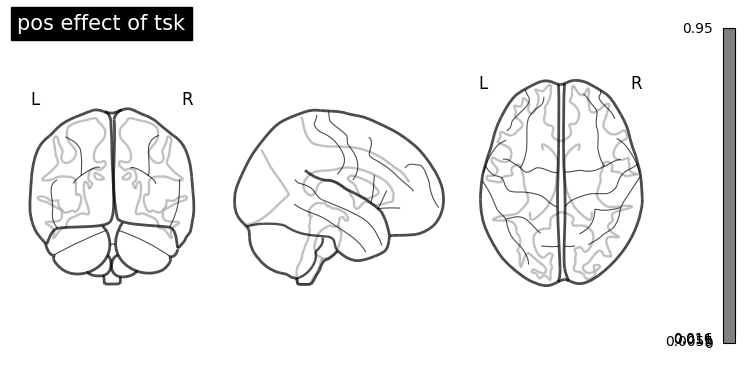

In [41]:
plotting.plot_glass_brain(pos_tsk_20, title="pos effect of tsk", threshold=0.95, colorbar=True)

/tmp/ipykernel_49415/4176716352.py:1: UserWarning: empty mask
  plotting.plot_glass_brain(neg_tsk_20, title="neg effect of tsk", threshold=0.95, colorbar=True)


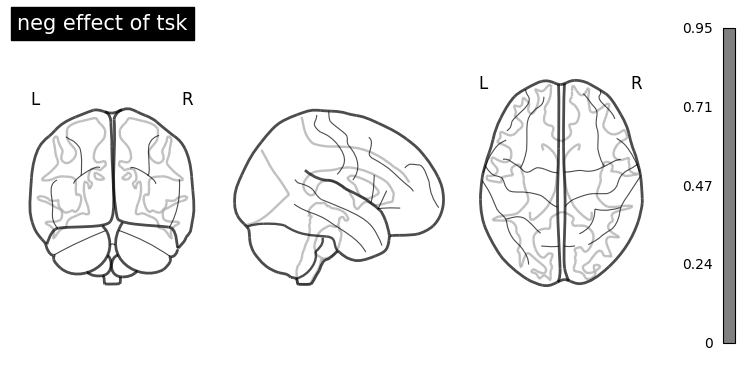

In [42]:
plotting.plot_glass_brain(neg_tsk_20, title="neg effect of tsk", threshold=0.95, colorbar=True)

In [43]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-10-08T06:58:07.594081+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

matplotlib: 3.8.4
json      : 2.0.9
pandas    : 2.3.2
nibabel   : 5.3.2
nipype    : 1.8.6
numpy     : 1.26.4
nilearn   : 0.12.1

